In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import igraph

sns.set_context("talk", font_scale=1.4)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('bikesharing/edges.txt', header=None, sep=' ')

In [3]:
df

,0,1,2
0,1,1,33
1,3,1,4
2,4,1,1
3,6,1,2
4,11,1,2
...,...,...,...
188458,615,750,1
188459,646,750,1
188460,708,750,1
188461,746,750,2


In [4]:
df2 = pd.read_csv('bikesharing/stations.csv')

In [5]:
df2

,id,name,terminalName,lat,long,installed,locked,installDate,removalDate,temporary,nbBikes,nbEmptyDocks,nbDocks
0,1,"River Street , Clerkenwell",1023,51.529163,-0.109971,True,False,1.278947e+12,NaN,False,11,8,19
1,2,"Phillimore Gardens, Kensington",1018,51.499607,-0.197574,True,False,1.278586e+12,NaN,False,37,0,37
2,3,"Christopher Street, Liverpool Street",1012,51.521284,-0.084606,True,False,1.278240e+12,NaN,False,28,3,32
3,4,"St. Chad's Street, King's Cross",1013,51.530059,-0.120974,True,False,1.278241e+12,NaN,False,5,18,23
4,5,"Sedding Street, Sloane Square",3420,51.493130,-0.156876,True,False,1.278241e+12,NaN,False,25,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,817,"Riverlight South, Nine Elms",300232,51.481335,-0.138212,True,False,1.464949e+12,NaN,False,19,6,26
766,818,"One Tower Bridge, Bermondsey",300249,51.503128,-0.078656,True,False,1.463660e+12,NaN,False,7,3,13
767,819,"Belvedere Road 2, South Bank",300246,51.506210,-0.114842,True,False,1.476360e+12,NaN,False,19,19,38
768,820,"Victory Place, Walworth",300239,51.492807,-0.091938,True,False,1.481808e+12,NaN,False,13,11,24


In [6]:
df3 = pd.read_csv('bikesharing/stationID.csv', index_col=0)
df3

,id1,id2
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
...,...,...
746,773,746
747,774,747
748,775,748
749,776,749


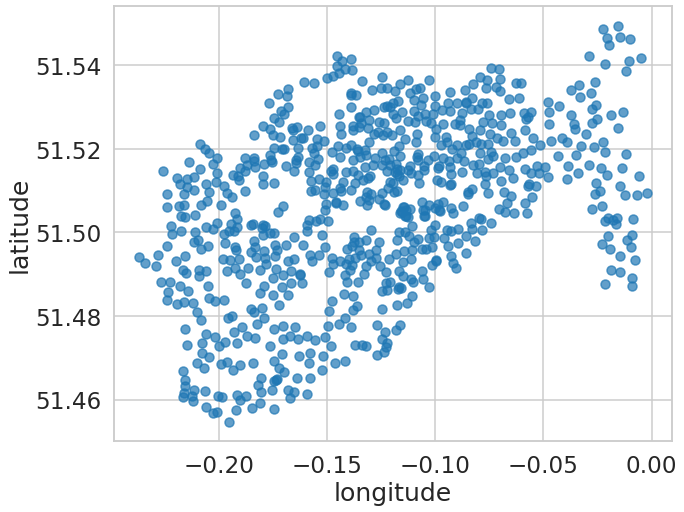

In [28]:
fig, ax = plt.subplots()
ax.scatter(df2['long'], df2['lat'], alpha=0.7)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid(True)
plt.show()

In [8]:
gd = igraph.Graph.TupleList(df.values.tolist(), directed=True, edge_attrs=['weight'])
g = igraph.Graph.TupleList(df.values.tolist(), directed=False, edge_attrs=['weight'])

In [9]:
info_map_clustering = gd.community_infomap(edge_weights=g.es['weight'], trials=20)

In [10]:
cluster_map = dict(zip(gd.vs['name'], info_map_clustering.membership))

In [11]:
df2['clusters_infomap'] = -1

for key, val in cluster_map.items():
    
    station_id = df3.loc[df3['id2'] == key, 'id1'].iloc[0]
    
    df2.loc[(df2['id'] == station_id),'clusters_infomap'] = val

df2_filtered = df2[df2['clusters_infomap'] != -1] 
df2_filtered

,id,name,terminalName,lat,long,installed,locked,installDate,removalDate,temporary,nbBikes,nbEmptyDocks,nbDocks,clusters_infomap
0,1,"River Street , Clerkenwell",1023,51.529163,-0.109971,True,False,1.278947e+12,NaN,False,11,8,19,0
1,2,"Phillimore Gardens, Kensington",1018,51.499607,-0.197574,True,False,1.278586e+12,NaN,False,37,0,37,2
2,3,"Christopher Street, Liverpool Street",1012,51.521284,-0.084606,True,False,1.278240e+12,NaN,False,28,3,32,0
3,4,"St. Chad's Street, King's Cross",1013,51.530059,-0.120974,True,False,1.278241e+12,NaN,False,5,18,23,0
4,5,"Sedding Street, Sloane Square",3420,51.493130,-0.156876,True,False,1.278241e+12,NaN,False,25,2,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,773,"Tallis Street, Temple",300096,51.511891,-0.107349,True,False,1.396263e+12,NaN,False,24,0,24,0
724,774,"Hurlingham Park, Parsons Green",300098,51.470131,-0.204640,True,False,1.396266e+12,NaN,False,9,11,20,1
725,775,"Little Brook Green, Brook Green",300101,51.496664,-0.223868,True,False,1.396270e+12,NaN,False,29,4,33,2
726,776,"Abyssinia Close, Clapham Junction",300099,51.460333,-0.167029,True,False,1.396273e+12,NaN,False,14,6,20,1


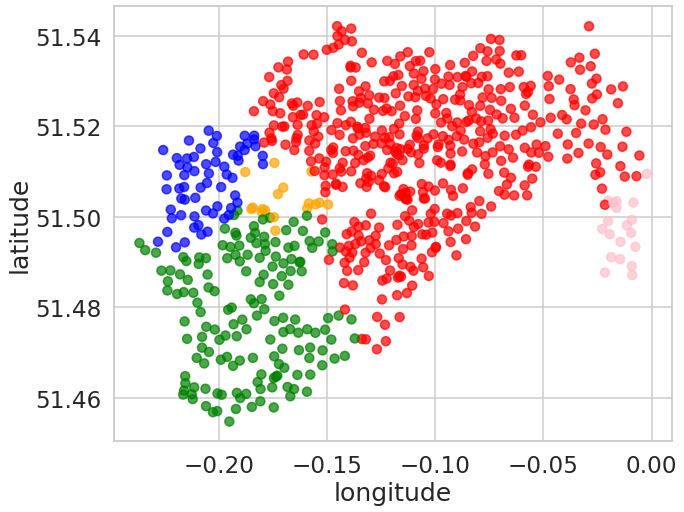

In [31]:
colormap = np.array(['red', 'green', 'blue', 'orange', 'pink'])
fig, ax = plt.subplots()
ax.scatter(df2_filtered['long'], df2_filtered['lat'], alpha=0.7, 
           c=colormap[df2_filtered['clusters_infomap']])
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid(True)
plt.show()

In [13]:
edge_weights = g.es['weight']
g = g.simplify()

In [14]:
fastgreedy_clustering = g.community_fastgreedy(weights=edge_weights)
cluster_map = dict(zip(gd.vs['name'], fastgreedy_clustering.as_clustering().membership))

In [15]:
df2_filtered['clusters_fastgreedy'] = -1

for key, val in cluster_map.items():
    
    station_id = df3.loc[df3['id2'] == key, 'id1'].iloc[0]
    
    df2_filtered.loc[(df2_filtered['id'] == station_id), 'clusters_fastgreedy'] = val

<ipython-input-15-8ea055ef4fa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['clusters_fastgreedy'] = -1
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [16]:
df2_filtered

,id,name,terminalName,lat,long,installed,locked,installDate,removalDate,temporary,nbBikes,nbEmptyDocks,nbDocks,clusters_infomap,clusters_fastgreedy
0,1,"River Street , Clerkenwell",1023,51.529163,-0.109971,True,False,1.278947e+12,NaN,False,11,8,19,0,0
1,2,"Phillimore Gardens, Kensington",1018,51.499607,-0.197574,True,False,1.278586e+12,NaN,False,37,0,37,2,0
2,3,"Christopher Street, Liverpool Street",1012,51.521284,-0.084606,True,False,1.278240e+12,NaN,False,28,3,32,0,0
3,4,"St. Chad's Street, King's Cross",1013,51.530059,-0.120974,True,False,1.278241e+12,NaN,False,5,18,23,0,0
4,5,"Sedding Street, Sloane Square",3420,51.493130,-0.156876,True,False,1.278241e+12,NaN,False,25,2,27,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,773,"Tallis Street, Temple",300096,51.511891,-0.107349,True,False,1.396263e+12,NaN,False,24,0,24,0,0
724,774,"Hurlingham Park, Parsons Green",300098,51.470131,-0.204640,True,False,1.396266e+12,NaN,False,9,11,20,1,2
725,775,"Little Brook Green, Brook Green",300101,51.496664,-0.223868,True,False,1.396270e+12,NaN,False,29,4,33,2,0
726,776,"Abyssinia Close, Clapham Junction",300099,51.460333,-0.167029,True,False,1.396273e+12,NaN,False,14,6,20,1,0


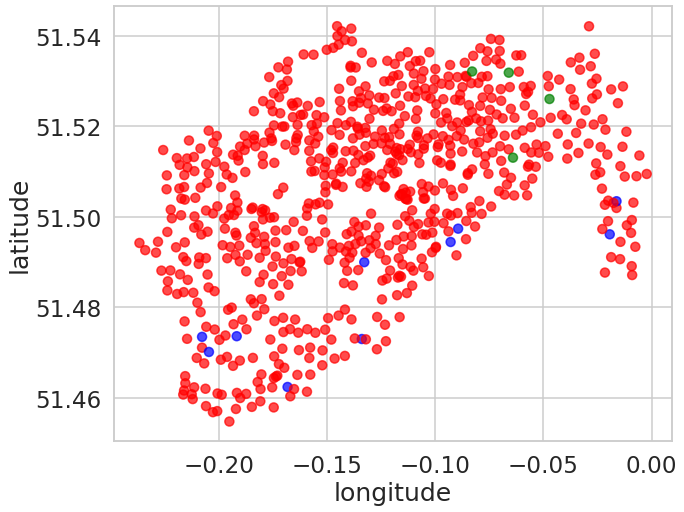

In [32]:
colormap = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'pink'])
fig, ax = plt.subplots()
ax.scatter(df2_filtered['long'], df2_filtered['lat'], alpha=0.7, 
           c=colormap[df2_filtered['clusters_fastgreedy']])
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid(True)
plt.show()

In [18]:
walktrap_clustering = g.community_walktrap(weights=edge_weights)
cluster_map = dict(zip(gd.vs['name'], walktrap_clustering.as_clustering().membership))

In [19]:
df2_filtered['clusters_walktrap'] = -1

for key, val in cluster_map.items():
    
    station_id = df3.loc[df3['id2'] == key, 'id1'].iloc[0]
    
    df2_filtered.loc[(df2_filtered['id'] == station_id), 'clusters_walktrap'] = val

<ipython-input-19-59b15c71c58e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['clusters_walktrap'] = -1
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/colesturza/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

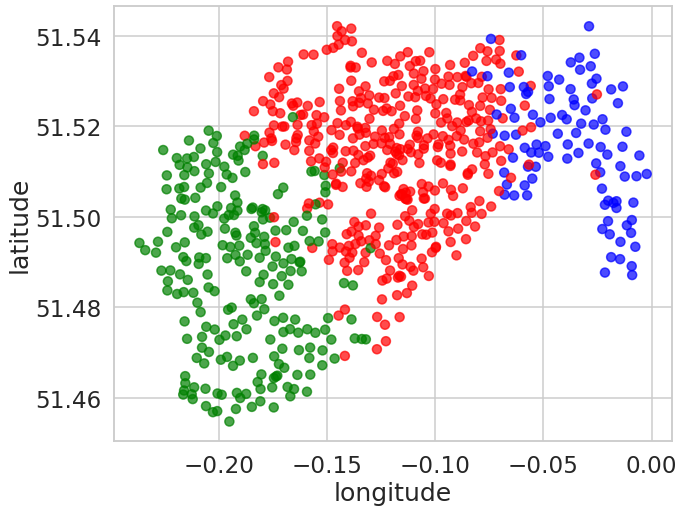

In [33]:
colormap = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'pink'])
fig, ax = plt.subplots()
ax.scatter(df2_filtered['long'], df2_filtered['lat'], alpha=0.7, 
           c=colormap[df2_filtered['clusters_walktrap']])
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.grid(True)
plt.show()